<a href="https://colab.research.google.com/github/kanjamwingirwa/Quantium_DataAnalytics_Internship/blob/kanja/Quantium_DataAnalytics_Internship_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
import plotly.express as px
warnings. filterwarnings("ignore")

In [132]:
#Let us begin by loading the datasets
purchase_behaviour_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
purchase_behaviour_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [133]:
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [134]:
#Let us begin by loading the datasets
transaktions_df = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaktions_df.tail(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [135]:
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# **Data Cleaning**

In [136]:
#let's check for null values
transaktions_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [137]:
purchase_behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no null values to speak of

In [138]:
#let's parse the dates

# Rename date column and separate into year, month, day etc
transaktions_df['Date'] = pd.to_datetime(transaktions_df['DATE'],errors='coerce',unit='d',origin='1900-01-01')
transaktions_df['Year'] = transaktions_df['Date'].dt.year
transaktions_df['Month'] = transaktions_df['Date'].dt.month
transaktions_df['DayOfWeek']  = transaktions_df['Date'].dt.day_name()

In [139]:
#lets check to see if the changes have been implemented
transaktions_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday


In [140]:
#lets change some columns into objects as they dont represent actual integers
transaktions_df['STORE_NBR'] = transaktions_df['STORE_NBR'].astype('object')
transaktions_df['LYLTY_CARD_NBR'] = transaktions_df['LYLTY_CARD_NBR'].astype('object')
transaktions_df['PROD_NBR'] = transaktions_df['PROD_NBR'].astype('object')
transaktions_df['TXN_ID'] = transaktions_df['TXN_ID'].astype('object')

In [141]:
#let's check to see if the changes have been implemented
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   Date            264836 non-null  datetime64[ns]
 9   Year            264836 non-null  int64         
 10  Month           264836 non-null  int64         
 11  DayOfWeek       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 24.2+ MB


In [142]:
#lets delete the date column as it no longer matters

transaktions_df = transaktions_df.drop(['DATE'], axis=1)
transaktions_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday


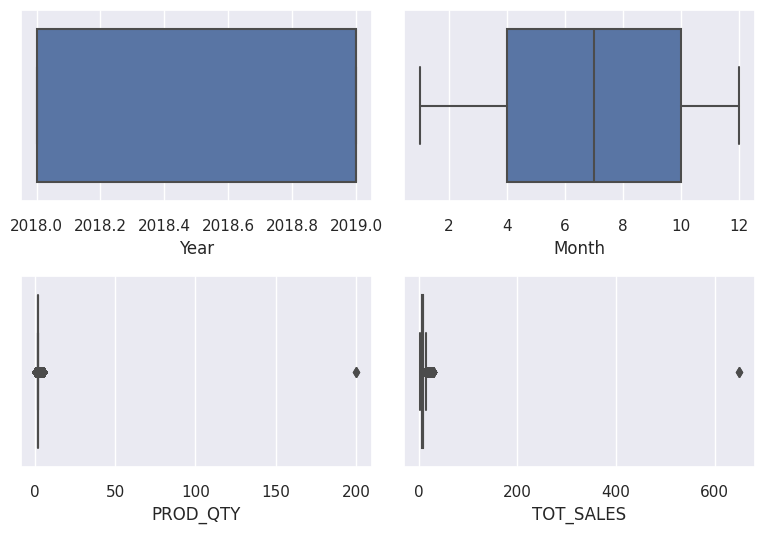

In [143]:
#let's look for outliers

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(x=transaktions_df['Year'], ax=axes[0,0])


sns.boxplot(x=transaktions_df ['Month'], ax=axes[0,1])
sns.boxplot(x=transaktions_df['PROD_QTY'], ax=axes[1,0])
sns.boxplot(x=transaktions_df['TOT_SALES'], ax=axes[1,1])

plt.tight_layout()


There are outliers in two columns that we have to deal with

In [144]:
#lets see exactly where the outlier is
outlier_df = transaktions_df.loc[(transaktions_df["PROD_QTY"]> 50) | (transaktions_df["TOT_SALES"] > 200)]
outlier_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-21,2018,8,Tuesday
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-22,2019,5,Wednesday


As we can see, these two transactions come from the same loyalty card number and hence, its probably a customer with special needs.

In [145]:
transaktions_df = transaktions_df.drop([69762, 69763])

In [146]:
outlier_df = transaktions_df.loc[(transaktions_df["PROD_QTY"]> 50) | (transaktions_df["TOT_SALES"] > 200)]
outlier_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek


The outliers habe been removed.

In [147]:
transaktions_df.describe()

,PROD_QTY,TOT_SALES,Year,Month
count,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.905813,7.299346,2018.500687,6.535943
std,0.343436,2.527241,0.500000,3.448682
min,1.000000,1.500000,2018.000000,1.000000
25%,2.000000,5.400000,2018.000000,4.000000
50%,2.000000,7.400000,2019.000000,7.000000
75%,2.000000,9.200000,2019.000000,10.000000
max,5.000000,29.500000,2019.000000,12.000000


We shall keep all the other outliers as they are not extreme.

In [148]:
# extracting the last word from product namewhich is the pkg details
transaktions_df['PROD_WGT']=transaktions_df['PROD_NAME'].apply(lambda x: x.split(" ")[-1])

In [149]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,SeaSalt175g
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175g


In [150]:
# removing the first word from product name
transaktions_df['PROD_DESC'] = transaktions_df['PROD_NAME'].str.split(n=1).str[1]

In [151]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,SeaSalt175g,Chip Compny SeaSalt175g
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175g,Nacho Cheese 175g


In [152]:
# also removing the last word further to get the product description
transaktions_df['PROD_DESC']=transaktions_df['PROD_DESC'].str.rsplit(' ',1).str[0]

In [153]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,SeaSalt175g,Chip Compny
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175g,Nacho Cheese


In [154]:
transaktions_df['PROD_DESC'] = transaktions_df['PROD_DESC']+' '+transaktions_df['PROD_WGT'].str[:-4]

In [155]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,SeaSalt175g,Chip Compny SeaSalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175g,Nacho Cheese


In [156]:
#extracting only numeric characters
transaktions_df['PROD_WGT']= transaktions_df.PROD_WGT.str.extract('(\d+)')

In [157]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,Chip Compny SeaSalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,Nacho Cheese


In [158]:
#lets look at our new dataset
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       264834 non-null  object        
 1   LYLTY_CARD_NBR  264834 non-null  object        
 2   TXN_ID          264834 non-null  object        
 3   PROD_NBR        264834 non-null  object        
 4   PROD_NAME       264834 non-null  object        
 5   PROD_QTY        264834 non-null  int64         
 6   TOT_SALES       264834 non-null  float64       
 7   Date            264834 non-null  datetime64[ns]
 8   Year            264834 non-null  int64         
 9   Month           264834 non-null  int64         
 10  DayOfWeek       264834 non-null  object        
 11  PROD_WGT        261577 non-null  object        
 12  PROD_DESC       264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 28.3+ MB


There are missing values in product_Weight, lets deal with that

In [159]:
#filling the missing values
transaktions_df['PROD_WGT'].mode()

0    175
Name: PROD_WGT, dtype: object

In [160]:
#fill the age column with 175 which is the mode
transaktions_df['PROD_WGT'].fillna(value=175, inplace=True)

In [161]:
#lets check if the changes have been implemented
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       264834 non-null  object        
 1   LYLTY_CARD_NBR  264834 non-null  object        
 2   TXN_ID          264834 non-null  object        
 3   PROD_NBR        264834 non-null  object        
 4   PROD_NAME       264834 non-null  object        
 5   PROD_QTY        264834 non-null  int64         
 6   TOT_SALES       264834 non-null  float64       
 7   Date            264834 non-null  datetime64[ns]
 8   Year            264834 non-null  int64         
 9   Month           264834 non-null  int64         
 10  DayOfWeek       264834 non-null  object        
 11  PROD_WGT        264834 non-null  object        
 12  PROD_DESC       264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 28.3+ MB


In [162]:
#we still need to do a little more cleaning in the 'PROD_DESC' column
import re
import string

def clean_text(text):
    #Make text lowercase,remove punctuation and remove words containing numbers
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text(x)

In [163]:
transaktions_df['PROD_DESC'] = transaktions_df.PROD_DESC.apply(clean)

In [164]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese


In [165]:
pd.set_option("display.max_rows", None)

In [166]:
transaktions_df['PROD_DESC'].value_counts()

original                            4673
mozzarella   basil  pesto           3304
tortilla chpshnyjlpno chili         3296
popd swtchlli srcream chips         3269
crisps     ched  chives             3268
popd sea salt  chips                3265
 swt pot sea                        3257
splash of  lime                     3252
thai sweetchili potatomix           3242
crnkle chip  orgnl big bag          3233
potato chips  hot  spicy            3229
sensations   camembert  fig         3219
corn chips  cheese supreme          3217
barbeque                            3210
corn chip mexican jalapeno          3204
sweet chilli and sour cream         3200
crinkle chips salt  vinegar         3197
chips light  tangy                  3188
corn chp     supreme                3183
sweetspcy bbq                       3177
crisps     lightly salted           3174
bbq rib   prawn crackers            3174
sea salt     and vinegar            3173
corn chip southern chicken          3172
 chicken        

We only want to deal with chips thus we drop salsa

In [167]:
transaktions_df = transaktions_df[transaktions_df['PROD_DESC'].str.contains("salsa") == False]

In [168]:
transaktions_df['PROD_DESC'].value_counts()

original                          4673
mozzarella   basil  pesto         3304
tortilla chpshnyjlpno chili       3296
popd swtchlli srcream chips       3269
crisps     ched  chives           3268
popd sea salt  chips              3265
 swt pot sea                      3257
splash of  lime                   3252
thai sweetchili potatomix         3242
crnkle chip  orgnl big bag        3233
potato chips  hot  spicy          3229
sensations   camembert  fig       3219
corn chips  cheese supreme        3217
barbeque                          3210
corn chip mexican jalapeno        3204
sweet chilli and sour cream       3200
crinkle chips salt  vinegar       3197
chips light  tangy                3188
corn chp     supreme              3183
sweetspcy bbq                     3177
crisps     lightly salted         3174
bbq rib   prawn crackers          3174
sea salt     and vinegar          3173
corn chip southern chicken        3172
 chicken                          3170
cheese     burger        

In [169]:
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       246740 non-null  object        
 1   LYLTY_CARD_NBR  246740 non-null  object        
 2   TXN_ID          246740 non-null  object        
 3   PROD_NBR        246740 non-null  object        
 4   PROD_NAME       246740 non-null  object        
 5   PROD_QTY        246740 non-null  int64         
 6   TOT_SALES       246740 non-null  float64       
 7   Date            246740 non-null  datetime64[ns]
 8   Year            246740 non-null  int64         
 9   Month           246740 non-null  int64         
 10  DayOfWeek       246740 non-null  object        
 11  PROD_WGT        246740 non-null  object        
 12  PROD_DESC       246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 26.4+ MB


In [170]:
transaktions_df['Date'].max()

Timestamp('2019-07-02 00:00:00')

In [171]:
transaktions_df['Date'].min()

Timestamp('2018-07-03 00:00:00')

In [172]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese


In [173]:
# Extracting first name from product name which is the brand name
transaktions_df['BRAND_NAME']=transaktions_df['PROD_NAME'].apply(lambda x: x.split(" ")[0])

In [174]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,Natural
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese,CCs


In [175]:
transaktions_df['BRAND_NAME'].replace({'WW': 'Woolworths', 'Dorito': 'Doritos', 'Snbts': 'Sunbites', 'Infzns':'Infuzions', 'NCC':'Natural', 'GrnWves':'Grain', 'Smith': 'Smiths'}, inplace=True)
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,Natural
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese,CCs


In [176]:
#lets change into lower case for better understanding
transaktions_df['BRAND_NAME'] = transaktions_df['BRAND_NAME'].apply(str. lower)
transaktions_df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,natural
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese,ccs
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,170,crinkle cut chips chicken,smiths
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday,175,chip thinly screamonion,smiths
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday,150,tortilla chpshnyjlpno chili,kettle


In [177]:
transaktions_df=transaktions_df.reset_index()

In [178]:
transaktions_df.head(2)

,index,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,natural
1,1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese,ccs


In [179]:
transaktions_df= transaktions_df.drop(['index'], axis=1)
#df.drop(['A'], axis=1)

In [180]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,natural
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,175,nacho cheese,ccs


## **Exploratory Data Analysis**

**By Date**

In [181]:
date_sales = pd.DataFrame(transaktions_df.groupby("Date").agg({'TOT_SALES':'sum'}))

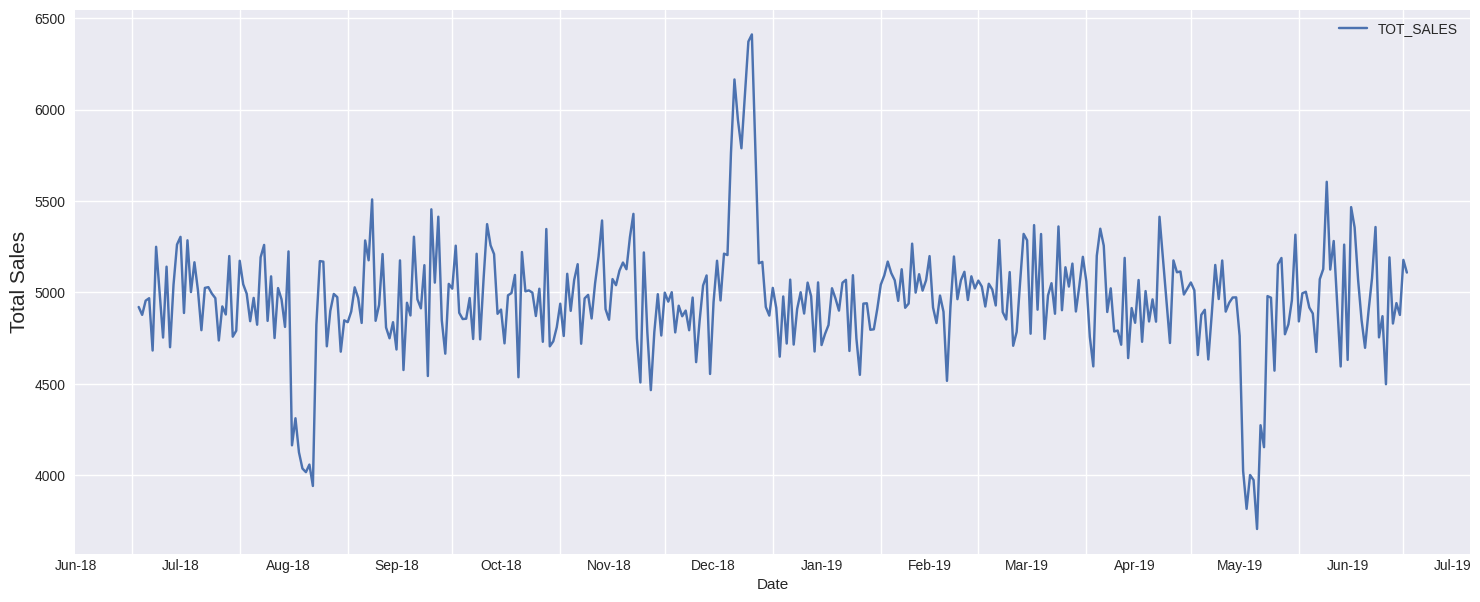

In [182]:
plt.style.use('seaborn')
fig = date_sales.plot(figsize=(18,8))
plt.ylabel("Total Sales",{'fontsize':15})
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b-%y"))

There seems to be a sudden hike in sales in december. Let's examine this.

In [183]:
december = pd.DataFrame({'Date' : pd.date_range(start='2018-12-01', end='2018-12-31'),'sales' : np.zeros((31))}).set_index('Date')
december.sales = date_sales.loc[[i for i in december.index if i in date_sales.index]]
december.fillna(0,inplace=True)

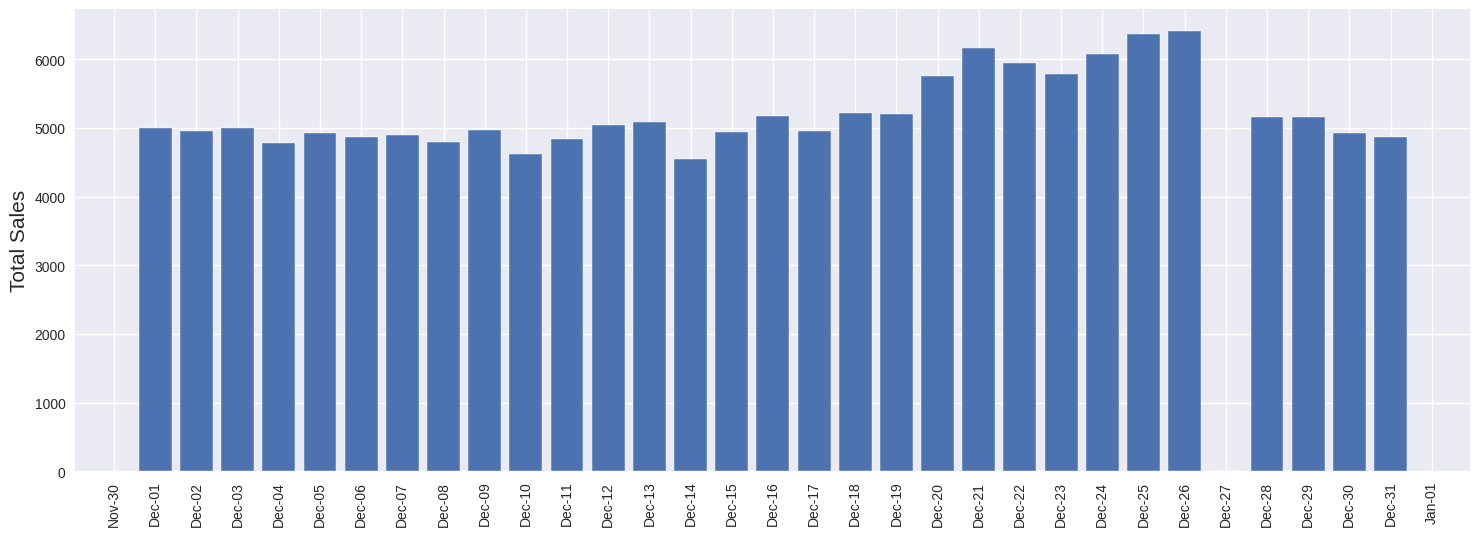

In [184]:
#lets visualize the above
fig = plt.figure(figsize=(18,6))
plt.bar(december.index,december.sales)
ax = plt.gca()
formatter = mdates.DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.ylabel("Total Sales",{'fontsize':15})
plt.xticks(rotation='vertical')
plt.show()

Dec 27th did not have any sales

**By Brand**

<Axes: ylabel='Brands'>

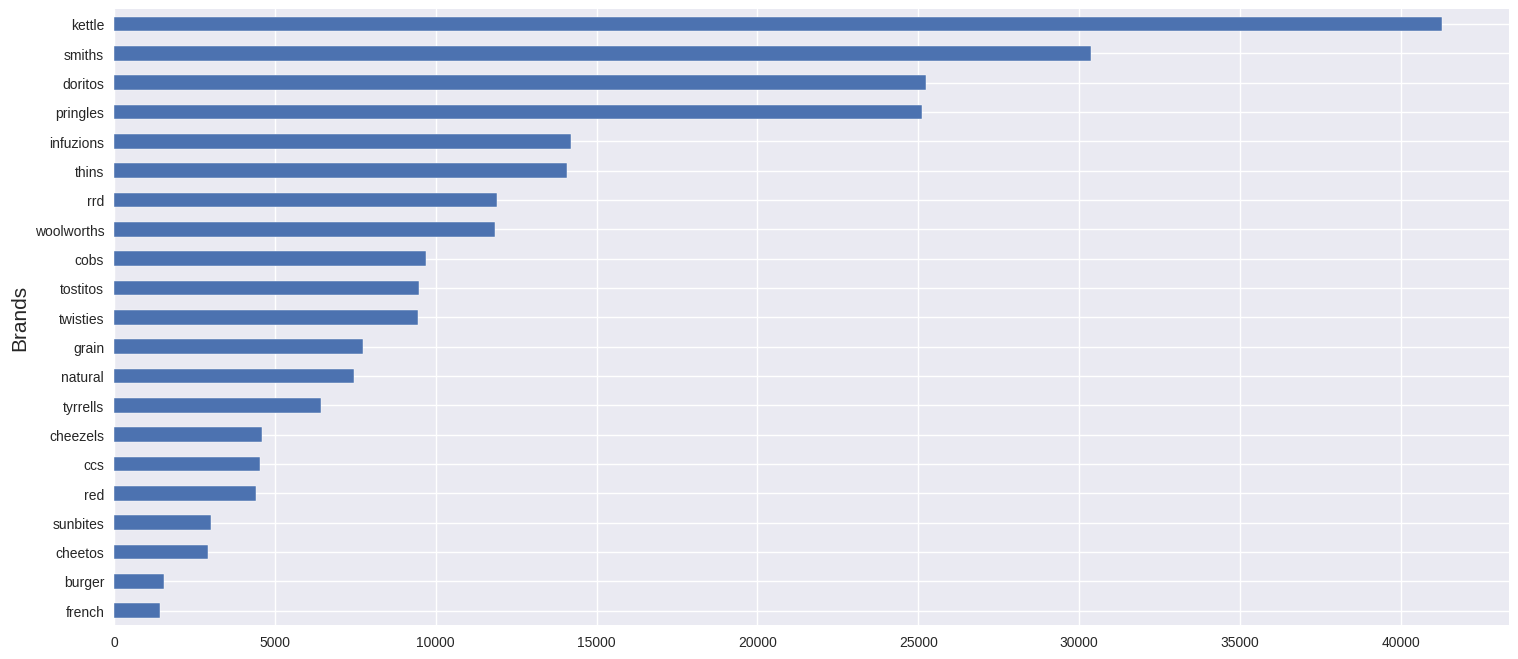

In [185]:
plt.xlabel('Number of Transactions',{'fontsize':15})
plt.ylabel('Brands',{'fontsize':15})
transaktions_df.BRAND_NAME.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

By Size of Packet

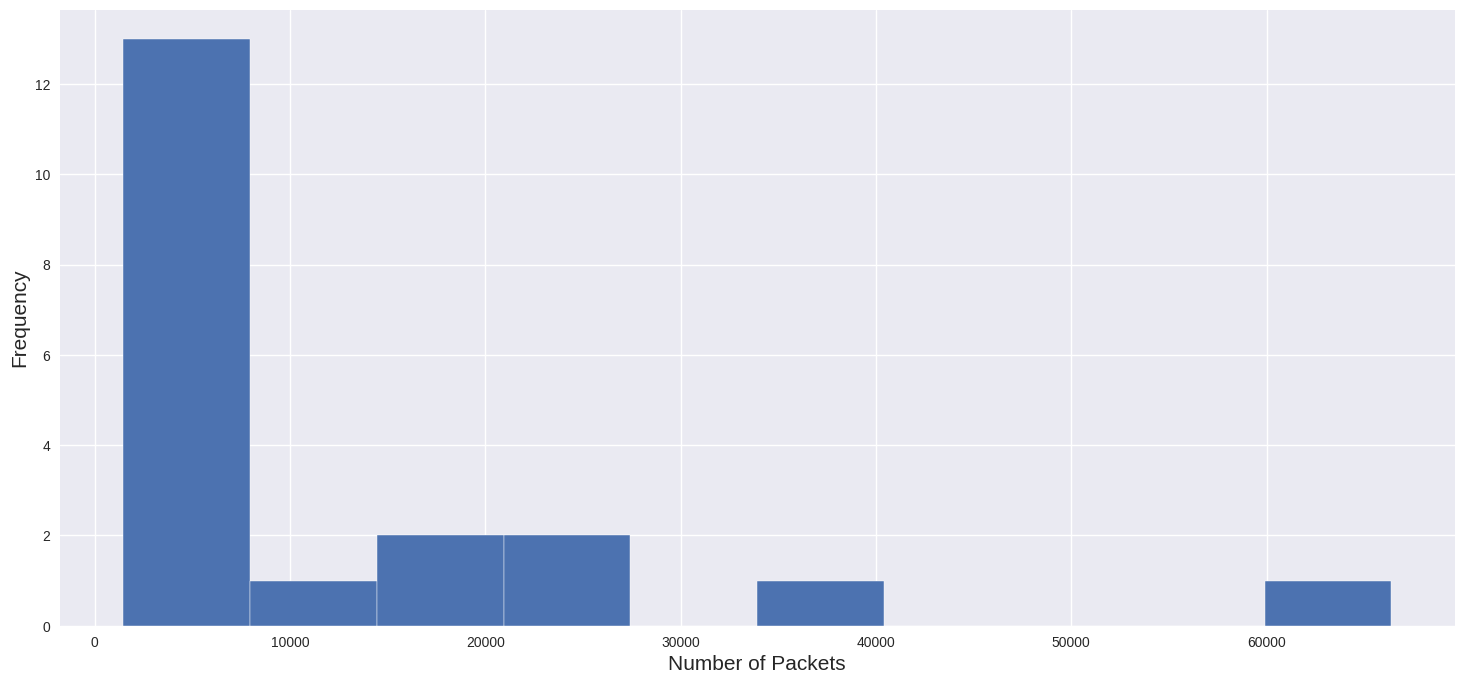

In [186]:
plt.xlabel('Number of Packets',{'fontsize':15})
plt.ylabel('Packet Size',{'fontsize':15})
transaktions_df.PROD_WGT.value_counts().plot(kind='hist',figsize=(18,8))
plt.xticks(rotation='horizontal')
plt.show()



The most popular is the 175g packet.
The biggest size is 380g while the smallest size is 70g

In [187]:
purchase_behaviour_df.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


Text(0, 0.5, '')

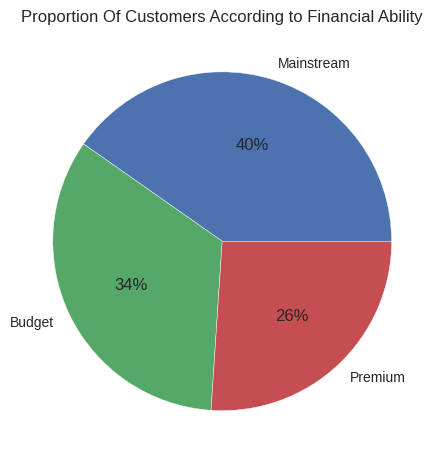

In [198]:
#Distribution of customer financial status
customersPie=purchase_behaviour_df['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie', autopct="%.0f%%", title='Proportion Of Customers According to Financial Ability')
customersPie.set_ylabel('')

A large majority of customers are in the mainstream financial status

Text(0, 0.5, '')

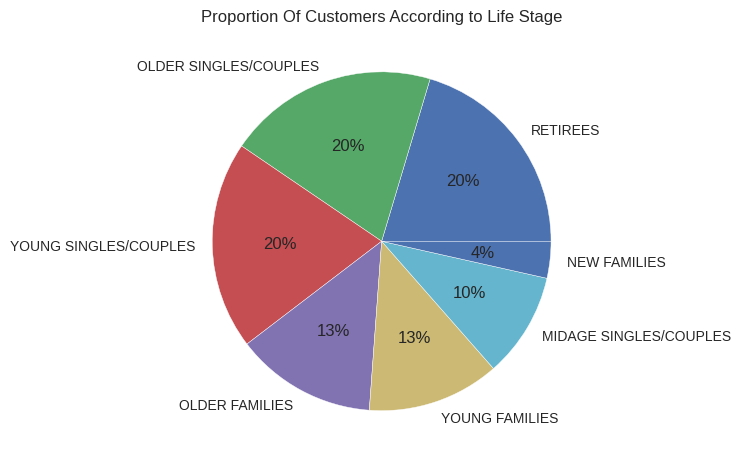

In [199]:
#Distribution of Customers' Lifestage
customersPie=purchase_behaviour_df['LIFESTAGE'].value_counts().plot(kind='pie', autopct="%.0f%%", title='Proportion Of Customers According to Life Stage')
customersPie.set_ylabel('')

<Axes: xlabel='PREMIUM_CUSTOMER'>

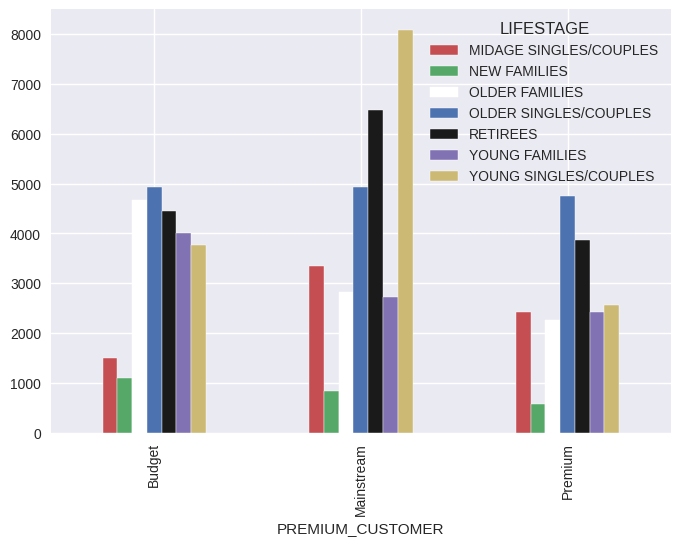

In [212]:
pd.crosstab(purchase_behaviour_df['PREMIUM_CUSTOMER'],purchase_behaviour_df['LIFESTAGE']).plot(kind='bar',stacked=False, color=['r', 'g','w', 'b', 'k', 'm', 'y'])

Most customers belong to the mainstream young singles/couples.

Premium members new families take up the least market segmentation.

Let's Merge the datasets

In [213]:
combined_df = pd.merge(purchase_behaviour_df,transaktions_df,on='LYLTY_CARD_NBR')
combined_df.tail(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
246735,2370651,MIDAGE SINGLES/COUPLES,Mainstream,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2018-08-05,2018,8,Sunday,380,corn chp supreme,doritos
246736,2370701,YOUNG FAMILIES,Mainstream,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2018-12-10,2018,12,Monday,210,waves sweet chilli,grain
246737,2370751,YOUNG FAMILIES,Premium,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2018-10-03,2018,10,Wednesday,150,tortilla chpsfetagarlic,kettle
246738,2370961,OLDER FAMILIES,Budget,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2018-10-26,2018,10,Friday,165,crisps lightly salted,tyrrells
246739,2373711,YOUNG SINGLES/COUPLES,Mainstream,88,241815,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,2018-12-16,2018,12,Sunday,330,crinkle chips salt vinegar,smiths


In [214]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246740 non-null  object        
 1   LIFESTAGE         246740 non-null  object        
 2   PREMIUM_CUSTOMER  246740 non-null  object        
 3   STORE_NBR         246740 non-null  object        
 4   TXN_ID            246740 non-null  object        
 5   PROD_NBR          246740 non-null  object        
 6   PROD_NAME         246740 non-null  object        
 7   PROD_QTY          246740 non-null  int64         
 8   TOT_SALES         246740 non-null  float64       
 9   Date              246740 non-null  datetime64[ns]
 10  Year              246740 non-null  int64         
 11  Month             246740 non-null  int64         
 12  DayOfWeek         246740 non-null  object        
 13  PROD_WGT          246740 non-null  object        
 14  PROD

In [215]:
#lets see the total number of unique customers
total_customers = combined_df['LYLTY_CARD_NBR'].nunique()
print(total_customers)

71287


Assuming every customer gets a unique card number, there are 71287 unique customers/

In [216]:
total_sales = combined_df['TOT_SALES'].sum()
print(total_sales)

1805177.7


There sales came to about 1.81M

In [218]:
#lets look at revenue changes over the years
changes = pd.DataFrame(combined_df.groupby([combined_df.Date.dt.year])['TOT_SALES'].sum())
changes

,TOT_SALES
Date,
2018,901580.95
2019,903596.75


There isn't much difference between the two years.

In [220]:
#brands by sales
brand_by_sales = pd.pivot_table(
   combined_df,
   index=['BRAND_NAME'],
   aggfunc={'TOT_SALES': np.sum,}
).sort_values(['TOT_SALES'],  ascending=[False])
print(brand_by_sales)

            TOT_SALES
BRAND_NAME           
kettle       390239.8
doritos      226329.9
smiths       217492.0
pringles     177655.5
infuzions     99047.6
thins         88852.5
twisties      81522.1
tostitos      79789.6
cobs          70569.8
rrd           64954.5
tyrrells      51647.4
grain         51617.2
natural       42318.0
woolworths    41059.1
cheezels      40029.9
red           22653.0
ccs           18078.9
cheetos       16884.5
sunbites       9676.4
french         7929.0
burger         6831.0


<Axes: title={'center': 'Brand by Sales'}, xlabel='BRAND_NAME'>

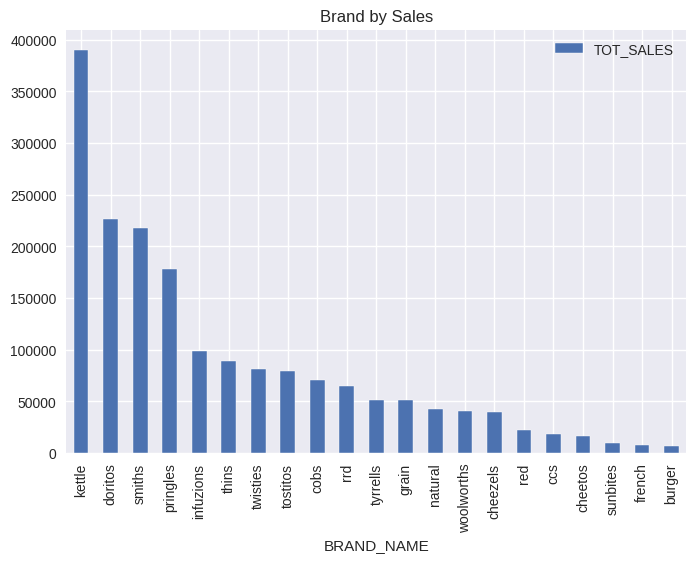

In [221]:
#create bar chart to visualize
brand_by_sales.plot(kind='bar', title= 'Brand by Sales')

In [231]:
#brands by sales
customer_by_sales = pd.pivot_table(
   combined_df,
   index=['PREMIUM_CUSTOMER','LIFESTAGE'],
   aggfunc={'TOT_SALES': np.sum,}
).sort_values(['TOT_SALES'],  ascending=[False])
print(customer_by_sales)

                                         TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES

<Axes: title={'center': 'Type of Customer by sales'}, xlabel='PREMIUM_CUSTOMER,LIFESTAGE'>

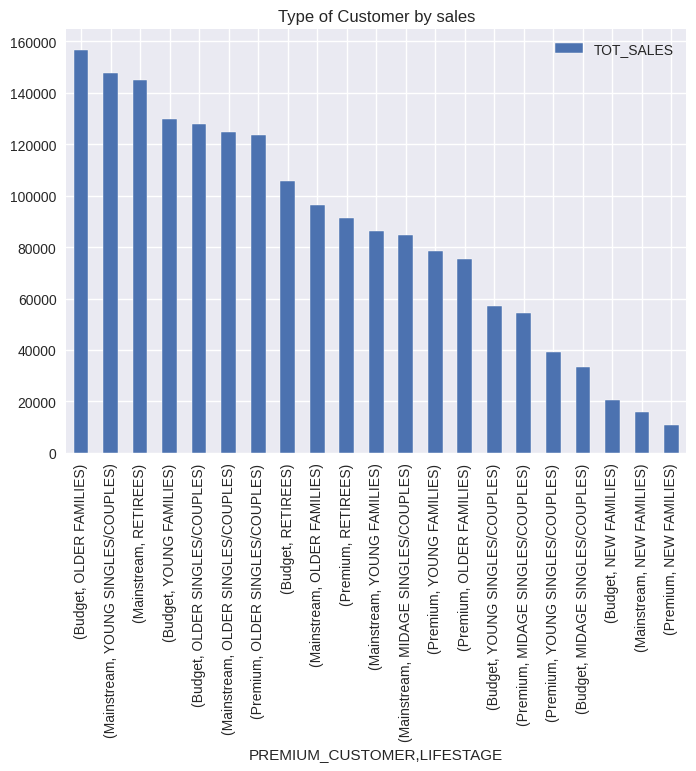

In [232]:
#create bar chart to visualize
customer_by_sales.plot(kind='bar', title= 'Type of Customer by sales')

Buedget Older Families spend the most on chips in the store. In terms of sheer numbers they come third. Could it be they are buying more than other categories?

In [233]:
combined_df.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,PROD_WGT,PROD_DESC,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,175,chip compny seasalt,natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-18,2018,9,Tuesday,150,rock deli chikngarlic aioli,red


In [235]:
customer_by_qts_bought = pd.pivot_table(
   combined_df,
   index=['PREMIUM_CUSTOMER','LIFESTAGE'],
   aggfunc={'PROD_QTY': np.sum,}
).sort_values(['PROD_QTY'],  ascending=[False])
print(customer_by_qts_bought)

                                         PROD_QTY
PREMIUM_CUSTOMER LIFESTAGE                       
Budget           OLDER FAMILIES             41853
Mainstream       RETIREES                   37677
                 YOUNG SINGLES/COUPLES      36225
Budget           YOUNG FAMILIES             34482
                 OLDER SINGLES/COUPLES      32883
Mainstream       OLDER SINGLES/COUPLES      32607
Premium          OLDER SINGLES/COUPLES      31695
Budget           RETIREES                   26932
Mainstream       OLDER FAMILIES             25804
Premium          RETIREES                   23266
Mainstream       YOUNG FAMILIES             23194
                 MIDAGE SINGLES/COUPLES     21213
Premium          YOUNG FAMILIES             20901
                 OLDER FAMILIES             20239
Budget           YOUNG SINGLES/COUPLES      15500
Premium          MIDAGE SINGLES/COUPLES     14400
                 YOUNG SINGLES/COUPLES      10575
Budget           MIDAGE SINGLES/COUPLES      8883


<Axes: title={'center': 'Type of Customer by sales'}, xlabel='PREMIUM_CUSTOMER,LIFESTAGE'>

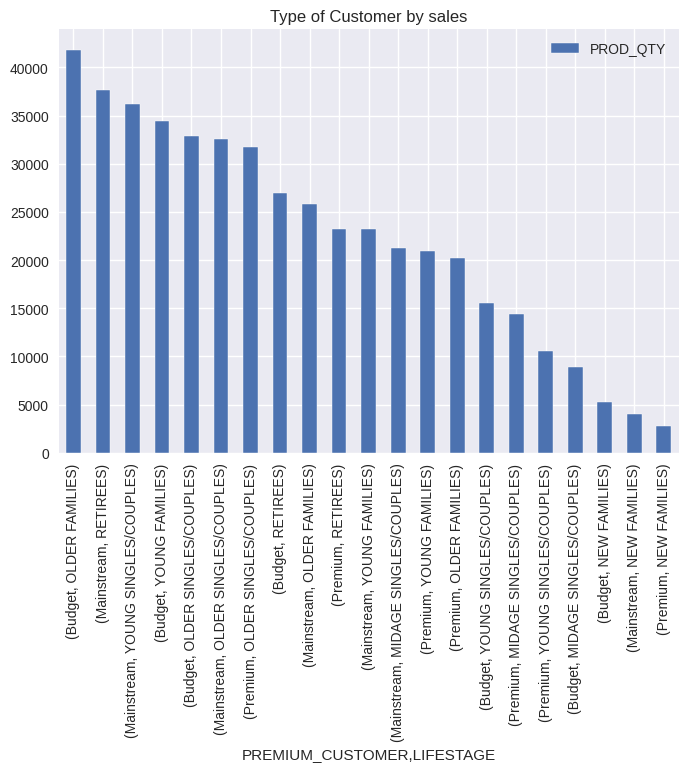

In [236]:
#create bar chart to visualize
customer_by_qts_bought.plot(kind='bar', title= 'Type of Customer by sales')

Budget older families buy the most in terms of quantity

In [241]:
customer_by_avg_spent = pd.pivot_table(
   combined_df,
   index=['PREMIUM_CUSTOMER','LIFESTAGE'],
   aggfunc={'TOT_SALES': np.mean,}
).sort_values(['TOT_SALES'],  ascending=[False])
print(customer_by_avg_spent)

                                         TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Mainstream       MIDAGE SINGLES/COUPLES   7.637156
                 YOUNG SINGLES/COUPLES    7.551279
Premium          RETIREES                 7.461315
                 OLDER SINGLES/COUPLES    7.459997
Budget           RETIREES                 7.445786
                 OLDER SINGLES/COUPLES    7.444305
Mainstream       NEW FAMILIES             7.313364
                 OLDER SINGLES/COUPLES    7.306049
Budget           YOUNG FAMILIES           7.302705
                 NEW FAMILIES             7.297256
                 OLDER FAMILIES           7.291241
Premium          YOUNG FAMILIES           7.285951
Mainstream       OLDER FAMILIES           7.281440
                 RETIREES                 7.269352
Premium          OLDER FAMILIES           7.232779
                 NEW FAMILIES             7.231720
Mainstream       YOUNG FAMILIES           7.226772
Premium          MIDAGE SINGLES

<Axes: title={'center': 'Type of Customer by sales'}, xlabel='PREMIUM_CUSTOMER,LIFESTAGE'>

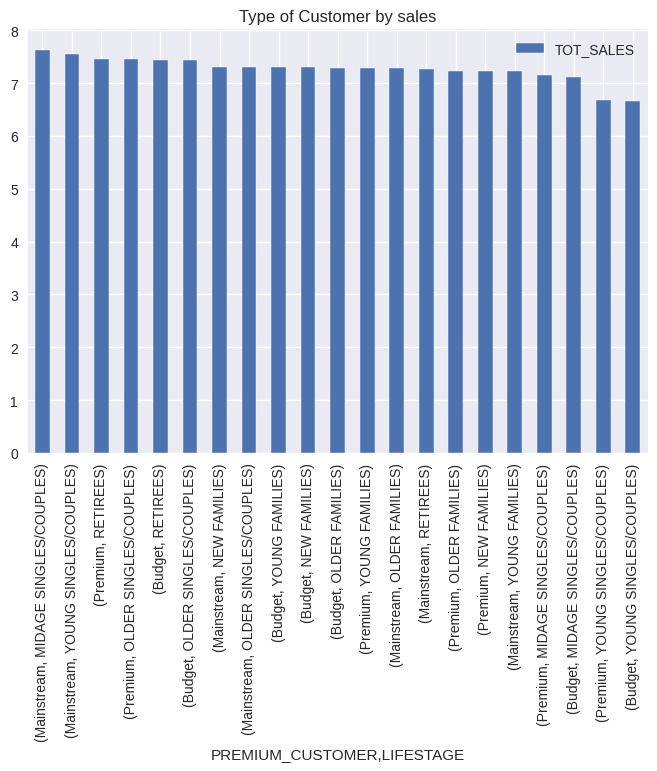

In [242]:
#create bar chart to visualize
customer_by_avg_spent.plot(kind='bar', title= 'Type of Customer by sales')

The avg spend for mainstream mid age singles/couples was the highest. Mainstream young couples spent a more customer than budget customers.


Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.


The difference between these two means is not that major so we need to test for statistical significance.

Let's test for statistical significance



In [ ]:
#Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
#A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether
#a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [250]:
combined_df["AVG_PACKET"] = combined_df ["TOT_SALES"] / combined_df["PROD_QTY"]

data1 = list(combined_df[(combined_df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (combined_df['PREMIUM_CUSTOMER'] == 'Mainstream')]["AVG_PACKET"])
data2 = list(combined_df[(combined_df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (combined_df['PREMIUM_CUSTOMER'] != 'Mainstream')]["AVG_PACKET"])

In [251]:
#lets compare the two means using a two tailed t-test
t_stat, p_value = ttest_ind(data1, data2)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  37.83196107667815
P-Value:  2.235645611549355e-309


The t-test results in a p>0.05,there is a statistical difference. Fail to reject null hyothesis.

The unit price for mainstream young and mid-age singles and couples are significantly higher than
that of budget or premium, young and midage singles and couples

